# 환경 세팅

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataPath = "/Users/yunhyeonchan/AI_Security_Project/Bot_Iot_Data_File/Entire_Dataset/"

In [5]:
data = pd.read_csv(dataPath + "UNSW_2018_IoT_Botnet_Final_10_Best.csv", sep = ';')
data = data.drop(columns = ['Unnamed: 0'])

In [6]:
data.head(5)

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


# Feature 분석

In [9]:
col_list = ['state_number','mean','drate','srate','max']
target_list = ['attack', 'category', 'subcategory']

In [10]:
mini_data = data[col_list + target_list]
mini_data.head()

,state_number,mean,drate,srate,max,attack,category,subcategory
0,1,0.068909,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,0.000131,0.000000,0.000000,0.000131,1,DoS,HTTP
2,1,0.064494,15.505319,0.567549,0.128988,1,DoS,HTTP
3,1,0.064189,15.578993,0.567570,0.128378,1,DoS,HTTP
4,1,0.063887,15.652637,0.567630,0.127774,1,DoS,HTTP


In [11]:
mini_data[target_list]

,attack,category,subcategory
0,1,DoS,HTTP
1,1,DoS,HTTP
2,1,DoS,HTTP
3,1,DoS,HTTP
4,1,DoS,HTTP
...,...,...,...
3668517,1,Theft,Keylogging
3668518,1,Theft,Keylogging
3668519,1,Theft,Keylogging
3668520,1,Theft,Keylogging


In [61]:
mini_data.category.value_counts()

DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: category, dtype: int64

In [62]:
mini_data.subcategory.value_counts()

UDP                  1981230
TCP                  1593180
Service_Scan           73168
OS_Fingerprint         17914
HTTP                    2474
Normal                   477
Keylogging                73
Data_Exfiltration          6
Name: subcategory, dtype: int64

## 1. state_number
Transaction state를 정규화 한 표현

확인 결과 
1: (tcp)
2: (arp)
3: (tcp)
4: (udp)
5: (ICMP)
~~~
다른 데이터셋에서는 state_number가 아닌 state가 있다. 이 데이터 셋에서는 state를 index로 바꾸어서 표현되어 있다.
'CON', 'INT', 'RST', 'FIN', 'URP', 'NRS', 'REQ', 'PAR', 'ECO','TST', 'MAS', 'CLO', 'ACC'
~~~
tcp ip를 제외한 나머지 프로토콜에 대한 state를 공부하기에는 너무 어렵다. ex) DBMS

+3글자 줄임말로는 너무 안나온다.
+다른 Feature간의 상관관계를 측정하려면 One-Hot Encoding이 좋은가..?

<AxesSubplot:>

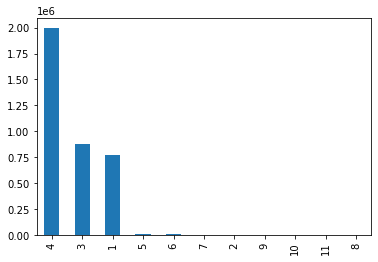

In [63]:
mini_data.state_number.value_counts().plot(kind='bar')

## 2. min, mean, max
mean, stddev, sum, min 및 max는 Argus 네트워크 보안 도구에 의해 계산된 집계된 세션 기간 정보

뭔지 잘 모르겠음 기간에 대한 describe 값들을 Feature로 만든건가..?

In [64]:
mini_data.describe()

,state_number,mean,drate,srate,max,attack
count,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06
mean,3.134390e+00,2.231063e+00,4.455046e-01,2.955111e+00,3.020015e+00,9.998700e-01
std,1.186971e+00,1.517728e+00,6.028863e+01,7.245425e+02,1.860877e+00,1.140212e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.819670e-01,0.000000e+00,1.559700e-01,2.806072e-01,1.000000e+00
50%,4.000000e+00,2.690125e+00,0.000000e+00,2.837830e-01,4.009111e+00,1.000000e+00
75%,4.000000e+00,3.565203e+00,0.000000e+00,4.882010e-01,4.293582e+00,1.000000e+00
max,1.100000e+01,4.981882e+00,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


## 3. drate, srate
drate => Destination-to-source packets per second

srate => Source-to-destination packets per second

rate : 걸리는 시간..?
왜 row 하나에 srate, drate가 같이 있지..? 보내고 주는 과정까지 모두 포함..?

In [27]:
attack_data = mini_data[mini_data['attack'] == 1]
normal_data = mini_data[mini_data['attack'] == 0]

In [56]:
print(attack_data.srate.describe())
print(normal_data.srate.describe())

count    3.668045e+06
mean     2.182565e+00
std      2.863889e+02
min      0.000000e+00
25%      1.560670e-01
50%      2.837830e-01
75%      4.882010e-01
max      2.500000e+05
Name: srate, dtype: float64
count        477.000000
mean        5943.699238
std        58124.557342
min            0.000000
25%            0.000000
50%            0.000000
75%            0.399814
max      1000000.000000
Name: srate, dtype: float64


In [57]:
print(attack_data.drate.describe())
print(normal_data.drate.describe())

count    3.668045e+06
mean     4.441284e-01
std      6.027320e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.882353e+04
Name: drate, dtype: float64
count     477.000000
mean       11.028535
std       133.643221
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2178.649170
Name: drate, dtype: float64


normal data와 attack data를 비교하여 보니 rate가 큰 차이를 보였다. 
-> 공격은 많은 일을 수행 안한다..?(Dos같이)

In [46]:
mini_data.corr(method='pearson')

,state_number,mean,drate,srate,max,attack
state_number,1.000000,0.571700,-0.003195,-0.004300,0.565371,0.002560
mean,0.571700,1.000000,-0.010660,-0.004883,0.908635,0.013011
drate,-0.003195,-0.010660,1.000000,0.034631,-0.011794,-0.002002
srate,-0.004300,-0.004883,0.034631,1.000000,-0.005476,-0.093502
max,0.565371,0.908635,-0.011794,-0.005476,1.000000,0.015207
attack,0.002560,0.013011,-0.002002,-0.093502,0.015207,1.000000


https://ieeexplore.ieee.org/document/9564345

https://arxiv.org/pdf/2104.02231.pdf